<a href="https://colab.research.google.com/github/JEMALkedir/Cement/blob/main/ML_Trail_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace 'filename.csv' with the actual file path)
data = pd.read_csv('/content/diabetes.csv')



# chek that missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [2]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

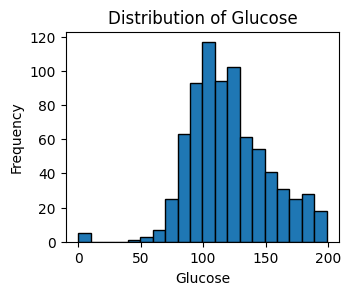

In [3]:
import matplotlib.pyplot as plt

# Create histograms for key variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(data['Glucose'], bins=20, edgecolor='k')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose')

# Repeat the above code for other variables as needed (e.g., 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI')

# Identify and handle outliers (replace 'variable' with the respective variable name)
Q1 = data['Pregnancies'].quantile(0.25)
Q3 = data['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data = data[(data['Pregnancies'] >= lower_bound) & (data['Pregnancies'] <= upper_bound)]

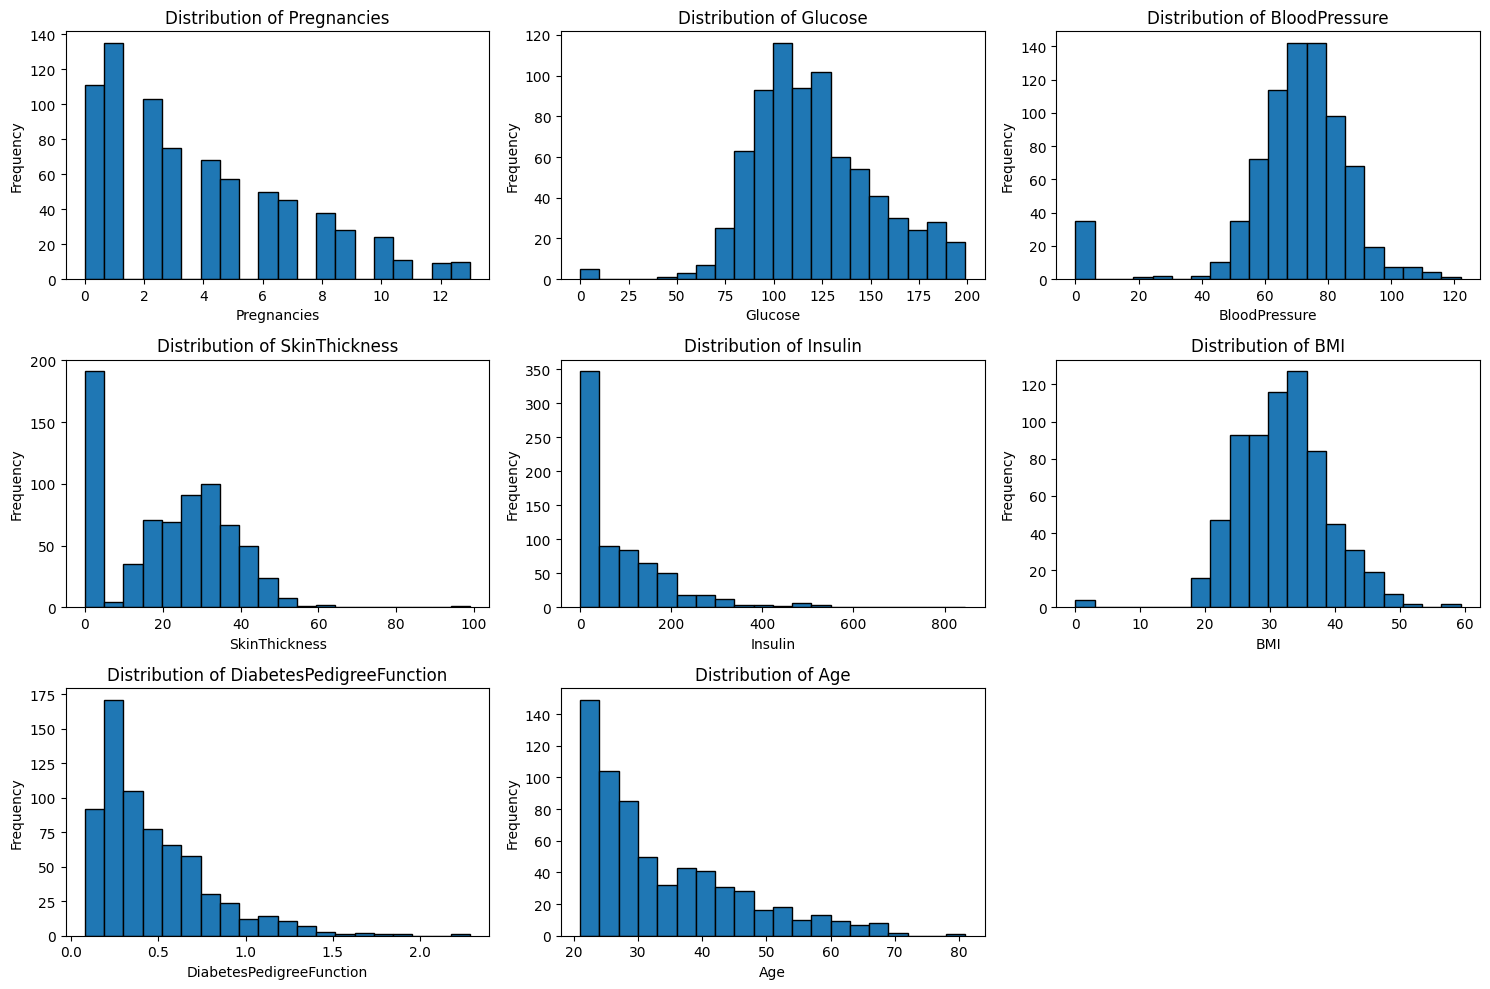

In [4]:

# List of variables to process
variables_to_process = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create histograms for key variables and handle outliers
plt.figure(figsize=(15, 10))

for i, variable in enumerate(variables_to_process, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[variable], bins=20, edgecolor='k')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {variable}')

    # Identify and handle outliers for each variable
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]

plt.tight_layout()
plt.show()


In [5]:

from sklearn.preprocessing import StandardScaler

# List of numeric features to scale
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale all numeric features
data[numeric_features] = scaler.fit_transform(data[numeric_features])

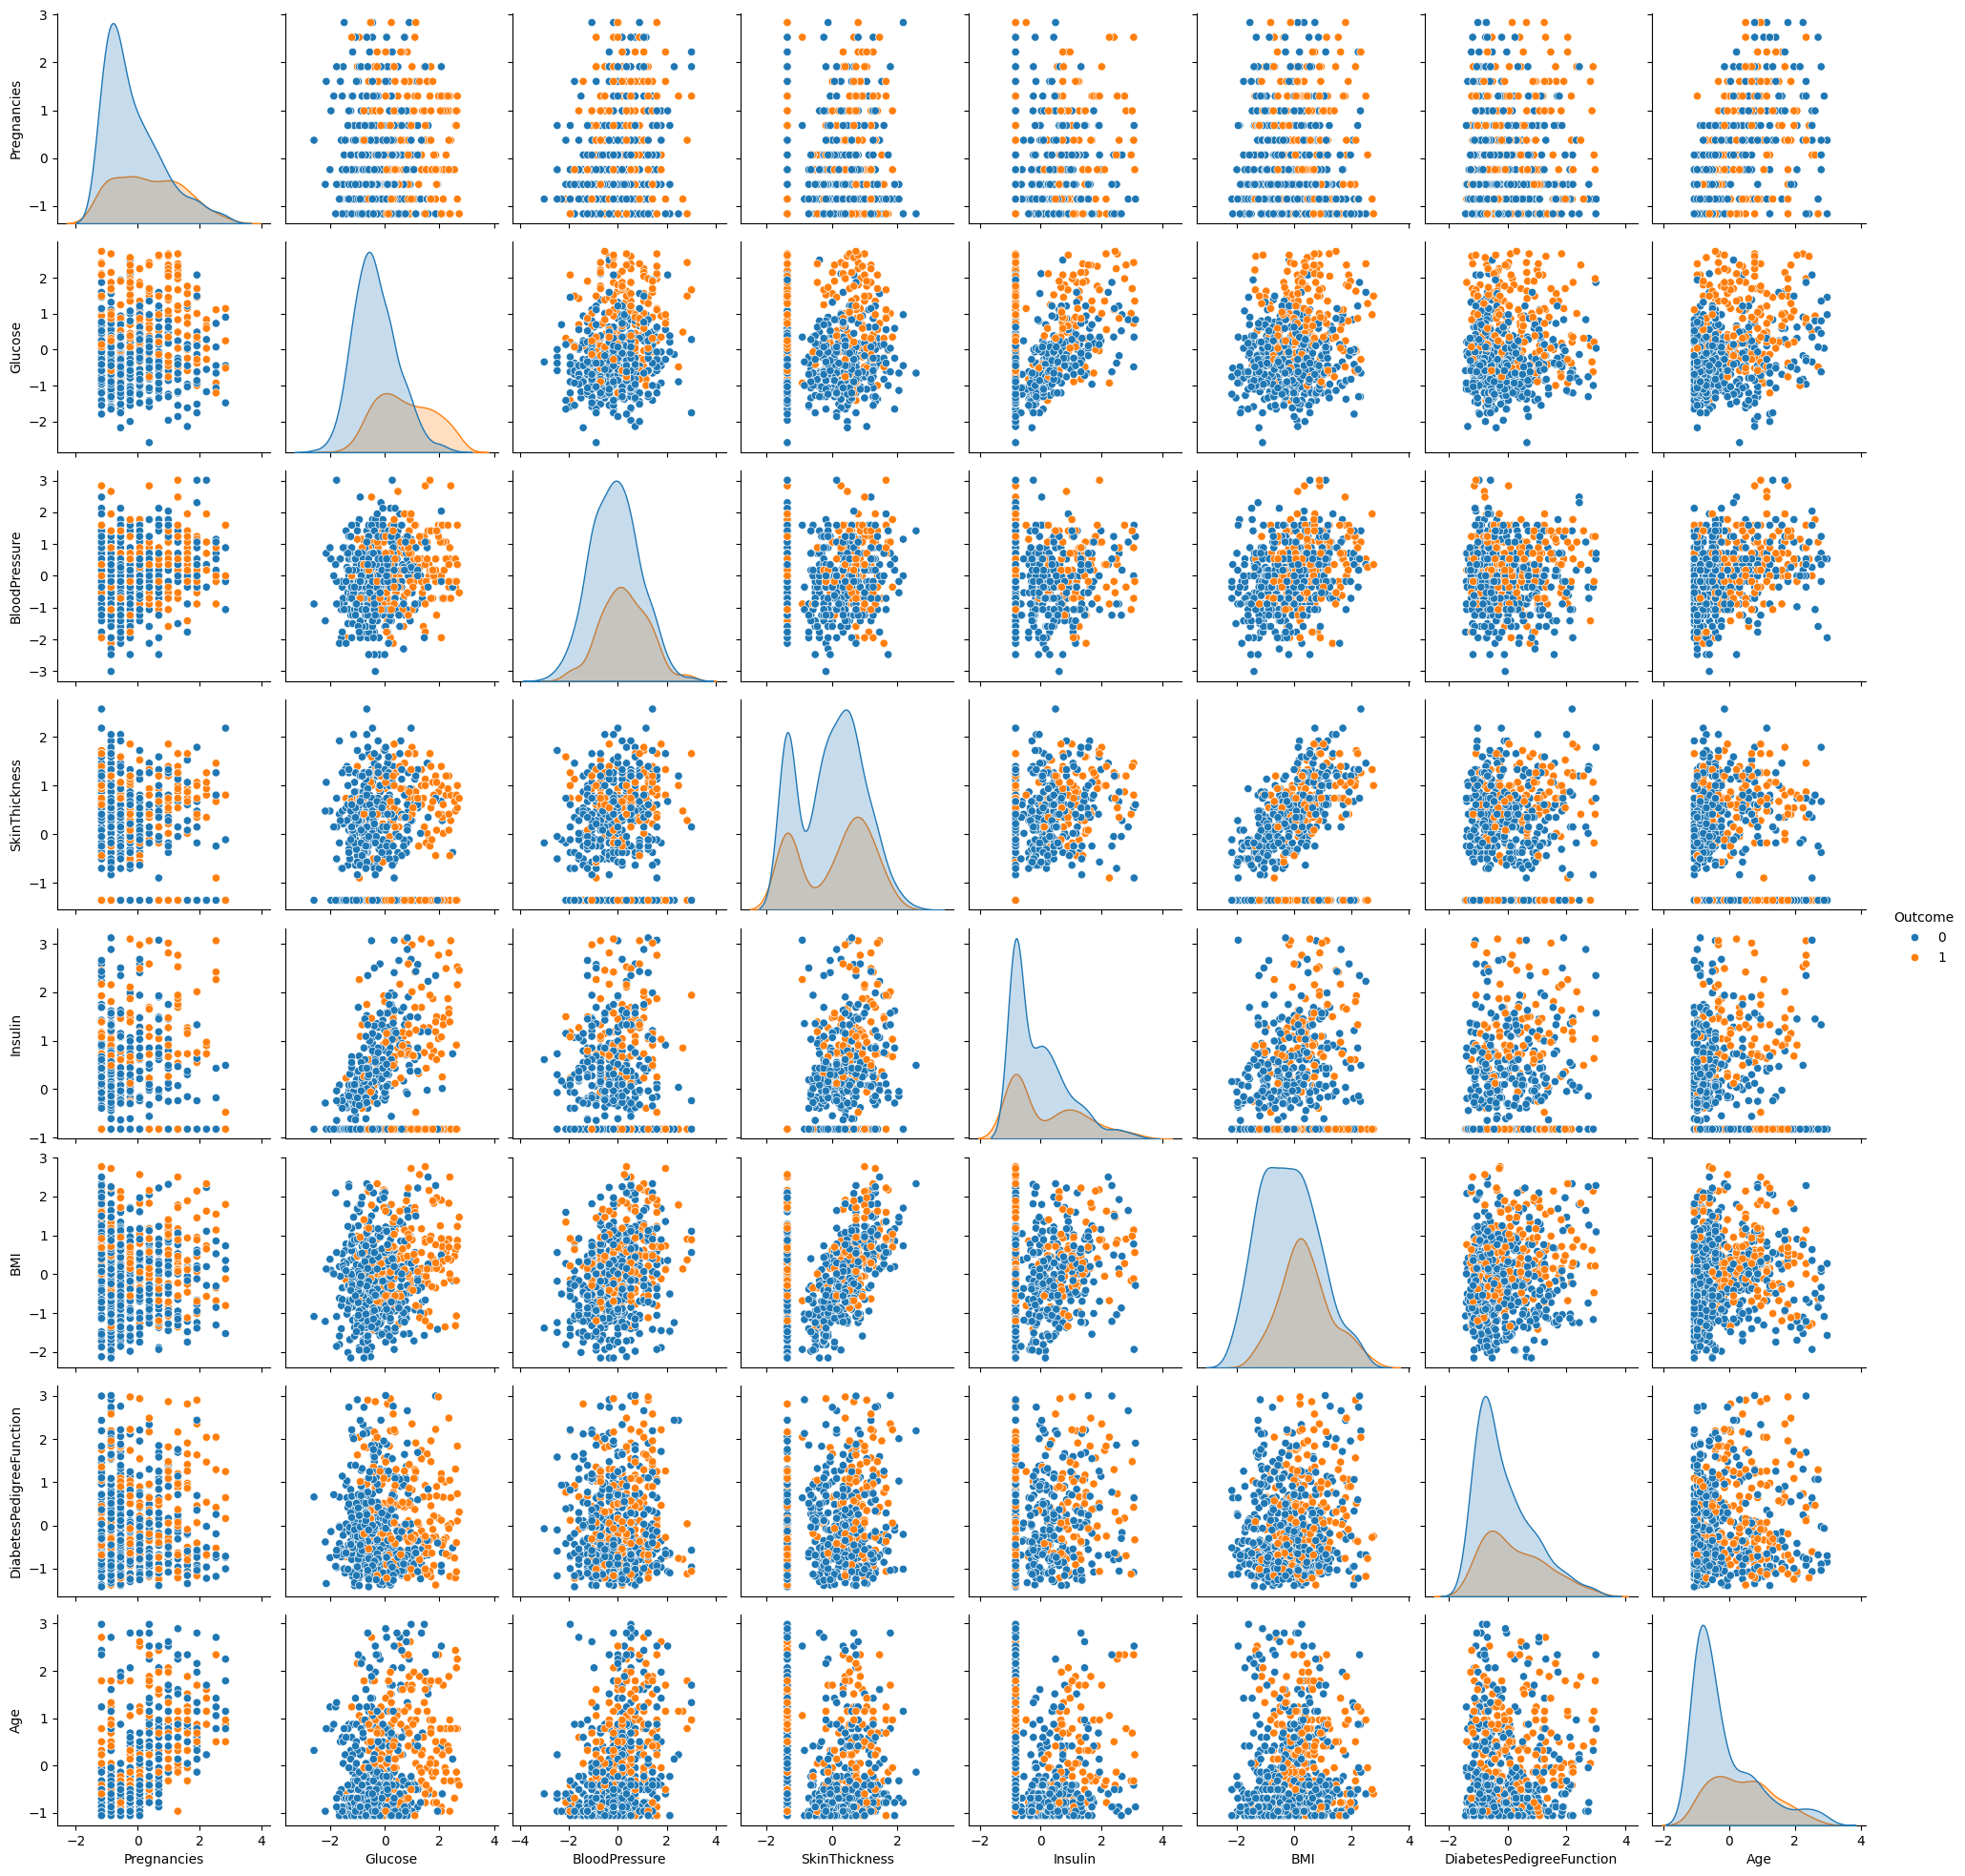

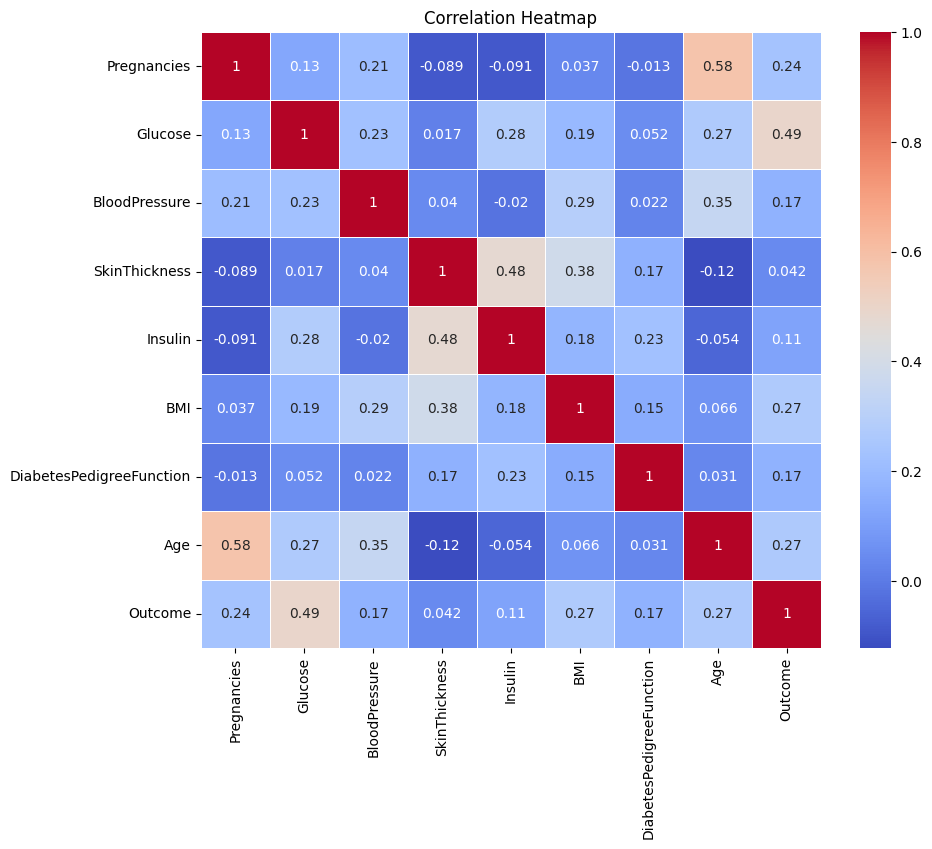

In [6]:
import seaborn as sns

# Pairwise relationships using pairplot
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.show()

# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [7]:

pairplot_summary = data.groupby('Outcome').describe()
print(pairplot_summary)

        Pregnancies                                                    \
              count      mean       std       min       25%       50%   
Outcome                                                                 
0             439.0 -0.157846  0.924018 -1.165393 -0.857590 -0.549787   
1             197.0  0.351748  1.075515 -1.165393 -0.549787  0.373623   

                            Glucose            ... DiabetesPedigreeFunction  \
              75%       max   count      mean  ...                      75%   
Outcome                                        ...                            
0        0.373623  2.836047   439.0 -0.330491  ...                 0.411452   
1        1.297032  2.836047   197.0  0.736476  ...                 1.003543   

                     Age                                                    \
              max  count      mean       std       min       25%       50%   
Outcome                                                                      
0   

In [8]:
correlation_matrix = data.corr()

# Text summary of correlation matrix
correlation_summary = correlation_matrix.to_string()

# Print the correlation summary
print("Correlation Matrix Summary:")
print(correlation_summary)

Correlation Matrix Summary:
                          Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age   Outcome
Pregnancies                  1.000000  0.130759       0.206581      -0.088675 -0.090608  0.037389                 -0.013274  0.582318  0.235631
Glucose                      0.130759  1.000000       0.227750       0.017161  0.280328  0.193989                  0.051546  0.268977  0.493355
BloodPressure                0.206581  0.227750       1.000000       0.039799 -0.019897  0.290307                  0.022308  0.345872  0.171178
SkinThickness               -0.088675  0.017161       0.039799       1.000000  0.475258  0.383783                  0.165758 -0.122427  0.042490
Insulin                     -0.090608  0.280328      -0.019897       0.475258  1.000000  0.177380                  0.225171 -0.053711  0.114653
BMI                          0.037389  0.193989       0.290307       0.383783  0.177380  1.000000           

In [9]:

# Summary statistics for key variables by 'Outcome' class
data.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].describe()

Pregnancies                                                    \
              count      mean       std       min       25%       50%   
Outcome                                                                 
0             439.0 -0.157846  0.924018 -1.165393 -0.857590 -0.549787   
1             197.0  0.351748  1.075515 -1.165393 -0.549787  0.373623   

                            Glucose            ...       BMI              Age  \
              75%       max   count      mean  ...       75%       max  count   
Outcome                                        ...                              
0        0.373623  2.836047   439.0 -0.330491  ...  0.515095  2.498130  439.0   
1        1.297032  2.836047   197.0  0.736476  ...  0.899161  2.764625  197.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Outcome                                                                        
0       -0.178871  0.977134 -1.062898 -0.878927 -0.510984  0.316888  2.984474  
1        0.398601  0.938018 -1.062898 -0.327012  0.316888  1.052774  2.708517  

[2 rows x 40 columns]

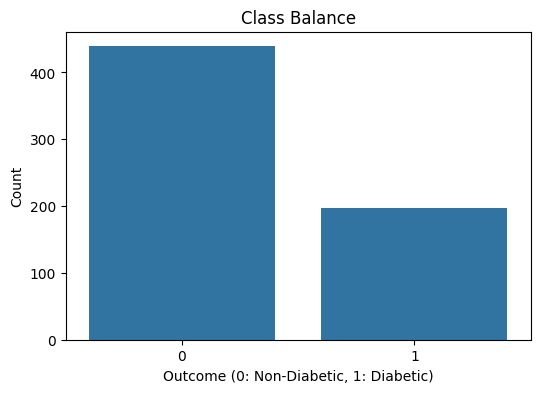

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot to visualize class balance
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.title('Class Balance')
plt.show()

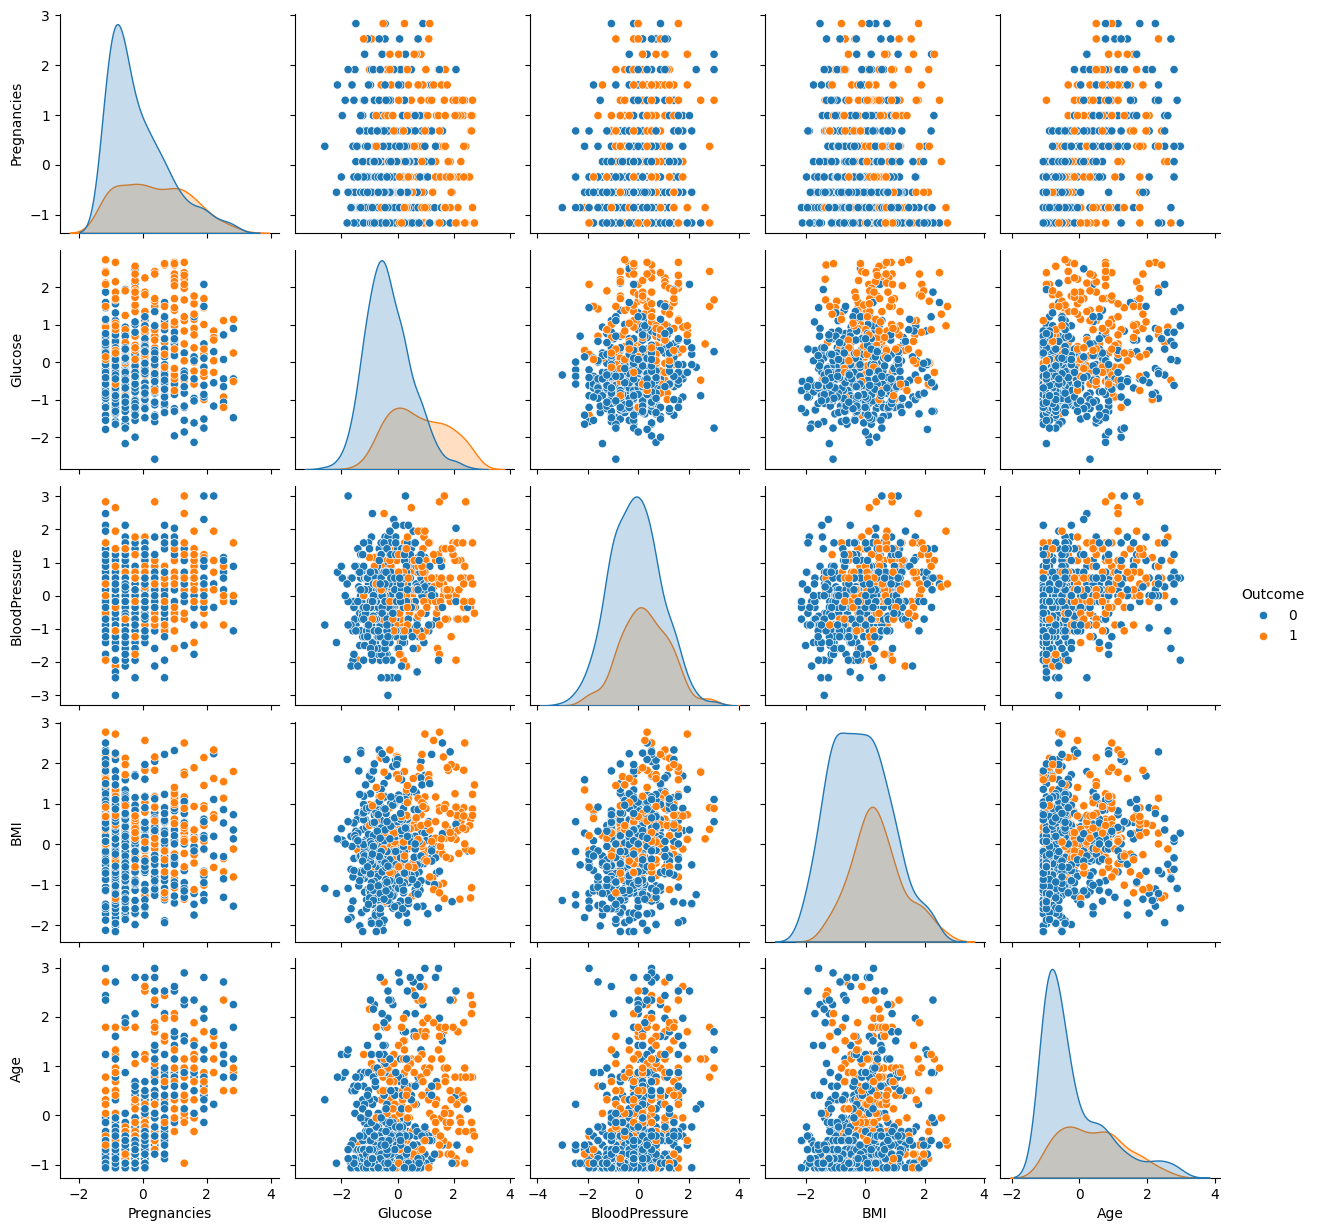

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for key variables colored by 'Outcome'
sns.pairplot(data=data, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], hue='Outcome', diag_kind='kde')
plt.show()

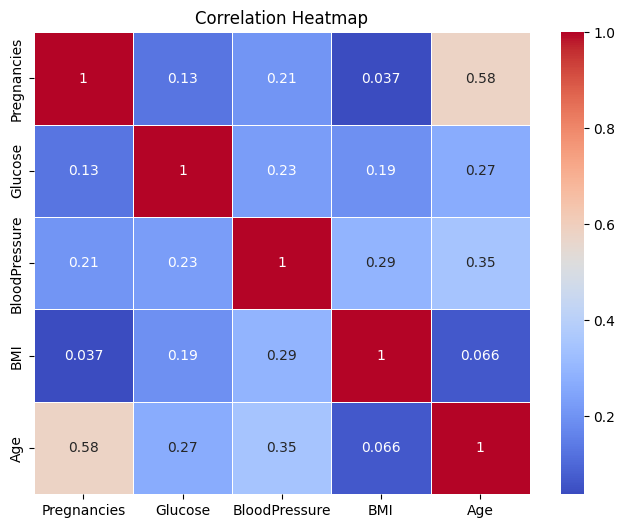

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Text summary statistics for key variables by 'Outcome' class
summary_statistics = data.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].describe()
print("summary statistics \n", summary_statistics)

# Count the occurrences of each class
class_counts = data['Outcome'].value_counts()
print("Class counts \n ", class_counts)


# Calculate pairwise correlations for key variables
pairwise_correlations = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].corr()
print("pairwise_correlations \n", pairwise_correlations)

# Calculate correlation matrix for key variables
correlation_matrix = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].corr()
print("correlation_matrix \n", correlation_matrix)


summary statistics 
         Pregnancies                                                    \
              count      mean       std       min       25%       50%   
Outcome                                                                 
0             439.0 -0.157846  0.924018 -1.165393 -0.857590 -0.549787   
1             197.0  0.351748  1.075515 -1.165393 -0.549787  0.373623   

                            Glucose            ...       BMI              Age  \
              75%       max   count      mean  ...       75%       max  count   
Outcome                                        ...                              
0        0.373623  2.836047   439.0 -0.330491  ...  0.515095  2.498130  439.0   
1        1.297032  2.836047   197.0  0.736476  ...  0.899161  2.764625  197.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Outcome                                        

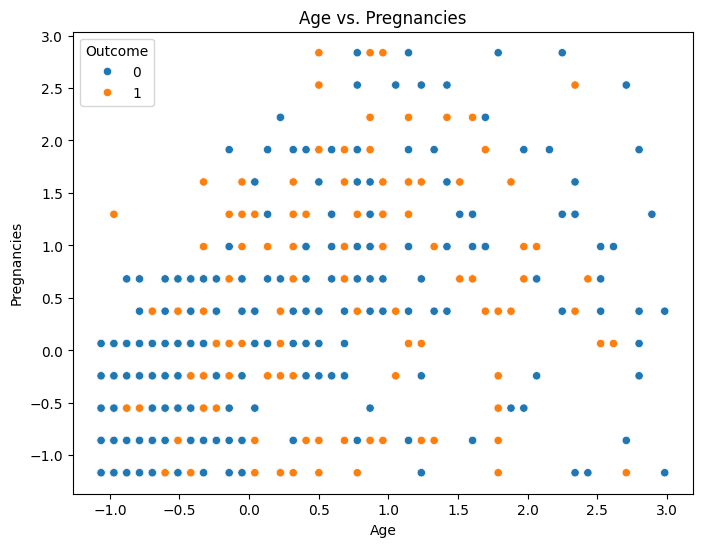

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Age vs. Pregnancies with differentiation by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Pregnancies', hue='Outcome')
plt.title('Age vs. Pregnancies')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()


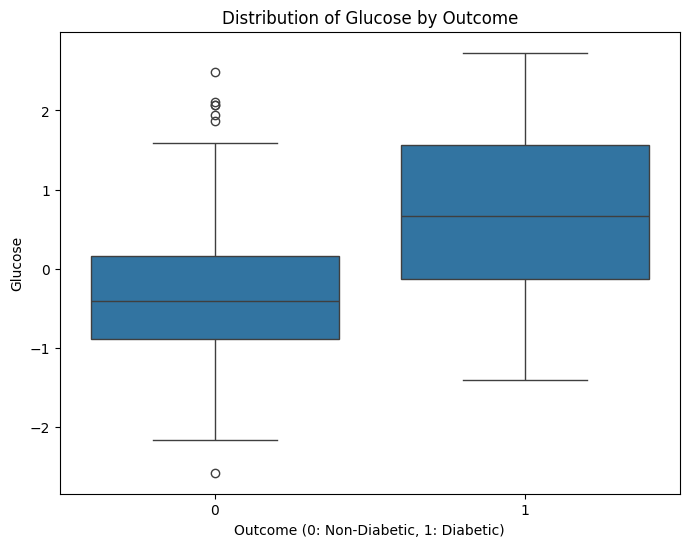

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Glucose by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Outcome', y='Glucose')
plt.title('Distribution of Glucose by Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Glucose')
plt.show()


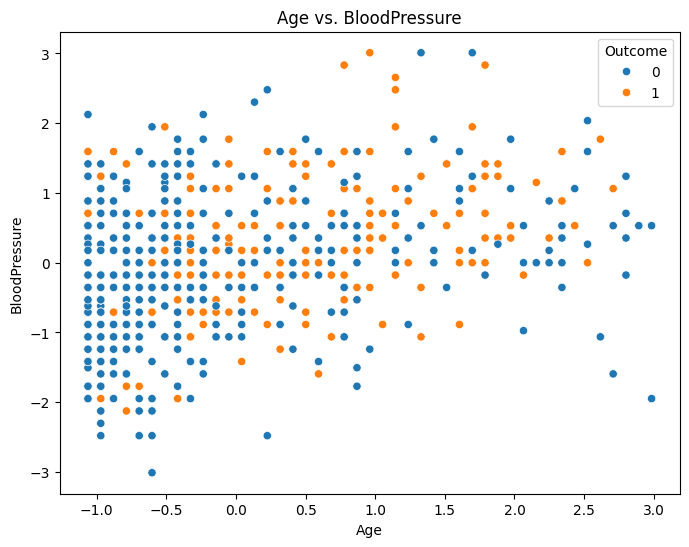

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Age vs. BloodPressure with differentiation by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='BloodPressure', hue='Outcome')
plt.title('Age vs. BloodPressure')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.show()

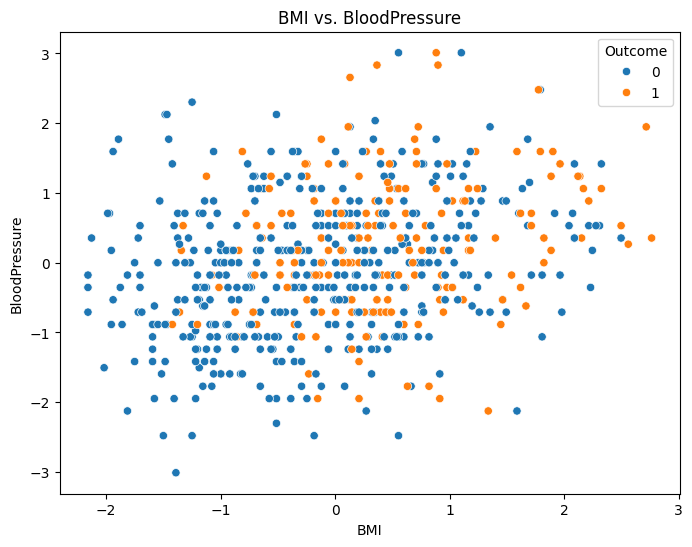

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for BMI vs. BloodPressure with differentiation by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='BMI', y='BloodPressure', hue='Outcome')
plt.title('BMI vs. BloodPressure')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.show()

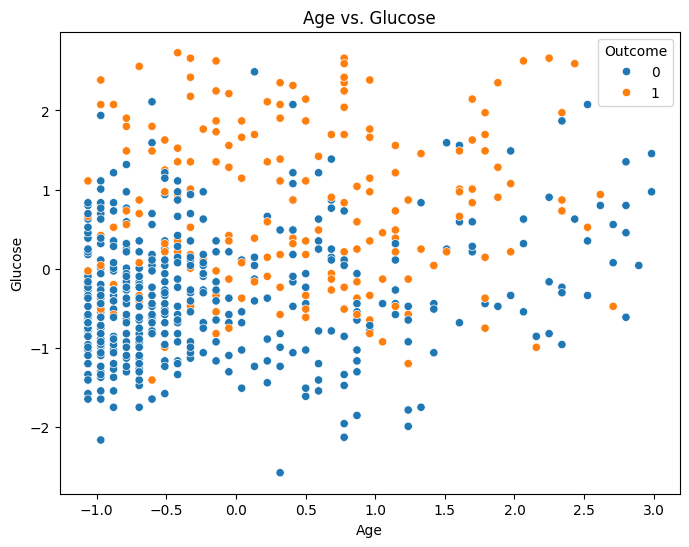

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Age vs. Glucose with differentiation by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Glucose', hue='Outcome')
plt.title('Age vs. Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()


Logistic Regression Model Summary:
Accuracy: 0.7266
Precision: 0.5200
Recall: 0.3611
F1-Score: 0.4262
ROC-AUC: 0.7585


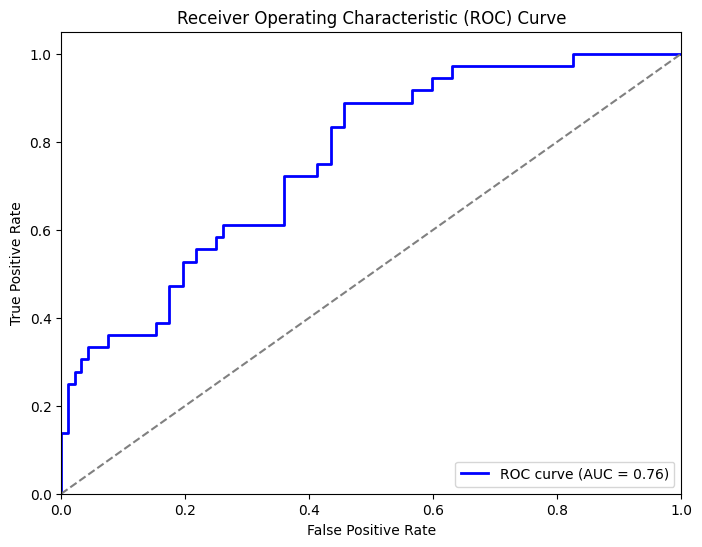

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 2. Train-Test Split
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)

# 4. Model Training
logistic_model.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC-AUC Curve
y_prob = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# 6. Interpretation (Feature Importance)
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

# 7. Model Summary
model_summary = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}

# 8. Conclusion
print("Logistic Regression Model Summary:")
for metric, value in model_summary.items():
    print(f"{metric}: {value:.4f}")

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()